<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue"><center><h2>Residual Values in Regression Analysis</h2></center></font><br>
<ul>
    <li>Simple linear regression models are used to determine the relationship between the magniture of one variable, to that of a second variable.</li><br>
    <li>In machine learning, this is typically to determine if one variable can be used to predict a second variable.</li><br>
    <li>Two key concepts and terms in regression is the <font color="blue"><em>Fitted Value</em></font> and the <font color="blue"><em>Residual Value</em></font></li><br>
    <li>The <strong>goal</strong> of this post is to discuss <font color="blue"><em>Residual Value</em></font>, and demonstrate how it can be calculate, and used in diagnostic plots for regression analysis.</li>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Import Dependencies</h1>

In [1]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()
# Math and dataframe modules
import numpy as np
import pandas as pd

# Stats module
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

<hr style="border-top: 3px solid Black;">

<h1> Import Data</h1>

<a href="https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset">Documentation</a>

<ul>
    <li>Instances: 442</li>
    <li>Attributes: 10</li>
    <li>Target:1 is the quantitative measure of disease progression one year after baselin</li> 
</ul>

<strong>References</strong>

<li>Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499.</li>

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target)

<h1>Create dataframe from X, y</h1>

In [3]:
# create dataframe from X, y for easier plot handling
names = ['age', 'sex','bmi','bp','s1','s2','s3','s4','s5','s6', 'DP']
dataframe = pd.concat([X, y], axis=1)
dataframe.columns = names
dataframe.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6     DP  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0

<hr style="border-top: 3px solid Black;">

<h1>Visually Explore Relationship Between T cells and Disease Progression</h1>

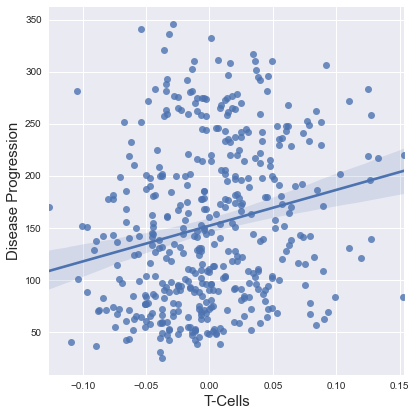

In [4]:
#Seaborn
ax = sns.lmplot(x='s1', y='DP', height=6, data=dataframe)
ax.set(xlabel='T-Cells', ylabel='Disease Progression')
plt.savefig("images/reg.png", bbox_inches='tight')
plt.show()

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue">Note</font><br>
<ul>
<li>In this plot, we see that the disease progression score increases with the number of T cells measured.</li><br>
    <li>The blue line is based on a function that tries to best estimate the relationship between the disease progression (target variable) and T-cells (feature/predictor variable).</li><br>
    <li>Note that a majority of the data does not fall exactly on the best fit line.</li><br>
    <li>The vertical distance between the actual data and the best fit line is the error in the prediction. We also call this the <em>residual.</em></li><br>
    <li>The equation below illustrates this using an explicit error term <code>e</code></li>
</ul>
</div>

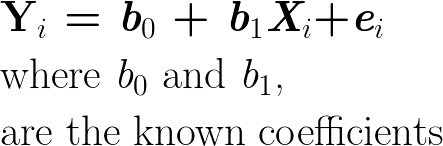

In [5]:
req_equ_error = os.path.join(path, 'images/equation_with_error.png')
Image(filename=req_equ_error) 

<hr style="border-top: 3px solid Black;">

<h1>How good is the regression model?</h1>

<div style="font-size:18px; border:1px solid black; padding:10px">
</font>
<ul>
<li>One metric used to evaluate the performance of a model is by looking at the distance between the actual data and the best fit line</li><br>
    <li>As illustrated below, the vertical red line segments are considered the error between the actual data (Y value) and the predicted data (Y hat value)</li><br>
    <li>The predicted value (the blue line) is also referred to as the <font color="red">fitted</font> value.  This value originates from the regression algorithm.</li><br>
    <li>The magnitude of this segment between the actual data point and the blue line at that x position (predictor) is referred to as the residual.</li><br>
    <li>The residual is used in various diagnostic plots to determine if the regression curve is linear, or better defined by some other function</li>
</ul>
</div>

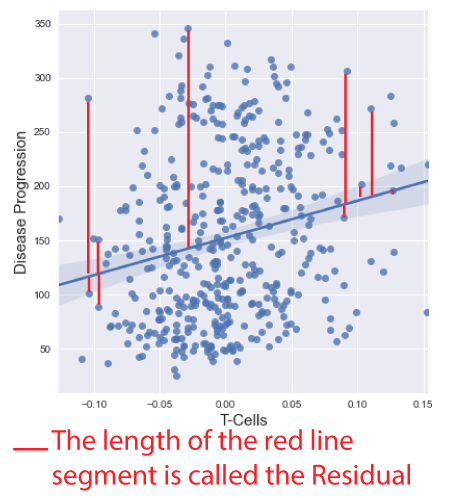

In [6]:
residual_segments = os.path.join(path, 'images/residual_segments.png')
Image(filename=residual_segments) 

<hr style="border-top: 3px solid Black;">

<h1>How to Calculate the Residual</h1>

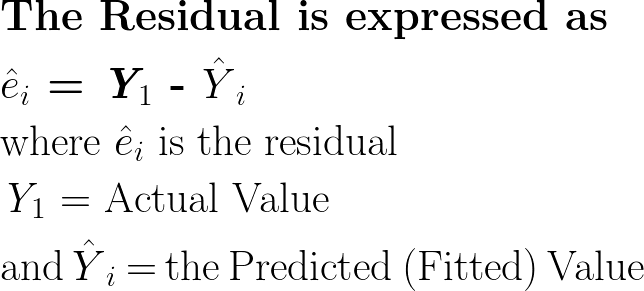

In [7]:
residual_formula = os.path.join(path, 'images/residual_formula.png')
Image(filename=residual_formula) 

<hr style="border-top: 3px solid Black;">

<h1>Use <code>statsmodels</code> to Calculate the Residuals</h1>

<h1>Step 1: Generate Ordinary Least Square Model</h1>

In [8]:
# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

<h1>Step 2: Use <code>model_fit.resid</code> to Obtain Array of Residuals</h1>

In [9]:
# model residuals
model_residuals = model_fit.resid
# model values (these are the predicted, or fitted values)
model_fitted_y = model_fit.fittedvalues

<h1>Step 3: Evaluate the Residuals vs Predictor Plot</h1>

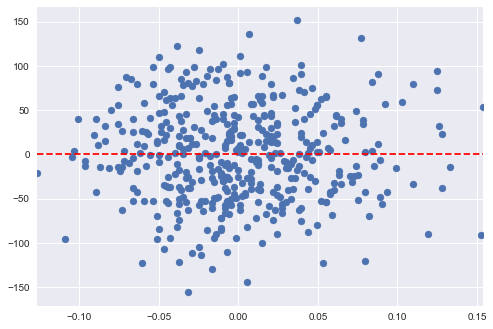

In [10]:
fig, ax = plt.subplots()
ax.scatter(dataframe.s1, model_residuals)
ax.hlines(0, dataframe.s1.min(), dataframe.s1.max(), linestyles='dashed', colors='r')
ax.set_xlim(dataframe.s1.min(), dataframe.s1.max())
plt.show()

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue">What does this plots reveal?</font><br>
<ul>
    <li>In this plot we are looking at how the residual scatter plot spreads along the horizontal red dashed line. Example in the left figure below.</li><br>
    <li>If there is no apparent pattern and the data points are randomly spread, then the error term in the relationship between the independent variables (T-cells) and the dependent variable (Disease progression) is the same across all values of the independent variables (T-cells).</li>
    <li>The residual plot above appears randomly distributed, suggesting it is homoscedastic (meaning “same variance”), and is central to linear regression models.</li><br>
    <li>If the plot has a pattern, such as the non-random u-shapped pattern in the bottom right figure, then the data is heteroscedastic, meaning the variance is not the same, this is also thought of as unequal scatter.</li><br>
    <li>Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity)</li><br>
    <li>Heteroscedasticity can affect the precision of the estimated coefficients used in the regression model and a u-shaped spread may suggest that a non-linear regression be considered.</li>
</ul>
</div>

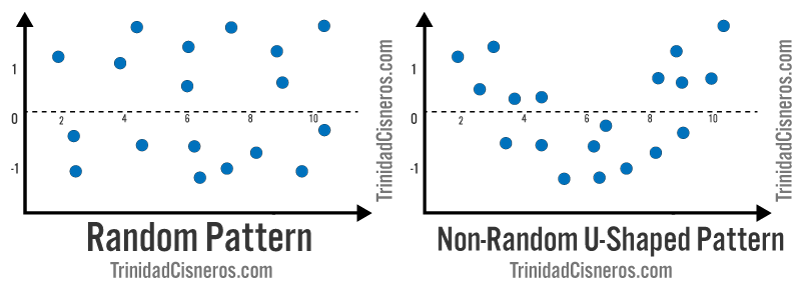

In [11]:
residual_plot_examples = os.path.join(path, 'images/residual_examples.png')
Image(filename=residual_plot_examples) 

<h1>Various Examples of How Residual Plots are Used as Diagnostic Tools in Regressions.</h1>

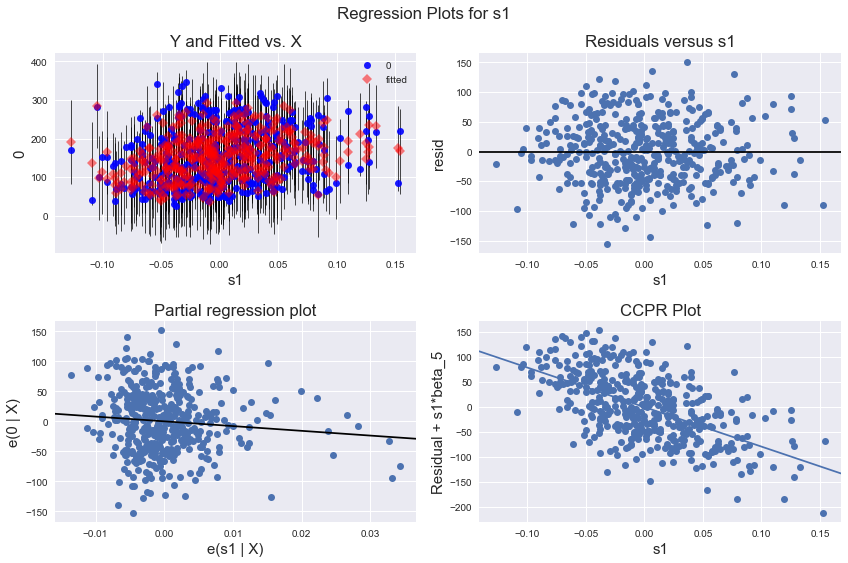

In [12]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model_fit, 's1', fig=fig)

<div style="font-size:18px; border:1px solid black; padding:10px">
<font color="blue">What do these plots mean?</font><br>
<ul>
    <li>The four plots above are examples of diagnostic tools based on residuals, and are especially informative when using Multiple Linear regressions.</li><br>
    <li>This example is overkill as we are only looking at one specific predictor variable.</li><br>
<li><font color="blue">Pay attention to the top right plot</font> This plot is the residual vs. feature of interest in this post. The x-axis on this plot shows the actual values for the predictor variable points (T cells) and the y-axis shows the residual for that value.</li><br>
    <li>Since the data points appear to be randomly distributed along the horizontal 0 line, suggest the data is not Heteroskedastisdic for the predictor variable.</li><br>
</ul>
</div>